In [1]:
import pandas as pd
import json 
from sodapy import Socrata
from sklearn.ensemble import GradientBoostingClassifier as gb 
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,accuracy_score
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as sc
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier as xg
import seaborn as sns 
import numpy as np 
import requests
import json
import math 

In [2]:
api_key='65f392e7e4e0e1e659b1b10077748fe0'
city_name='Buffalo,NY,USA'


In [3]:

url=f"https://api.weather.gov/points/42.88,-78.87"
response=requests.get(url).json()


In [4]:
response

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.88,-78.87',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-78.87, 42.88]},
 'properties': {'@id': 'https://api.weather.gov/points/42

In [5]:
url1=r'https://api.weather.gov/gridpoints/BUF/35,46/forecast/hourly'
response1=requests.get(url1)
if response1:
    print('Success!')
else:
    print('An error has occurred.')

Success!


In [6]:
#df=pd.DataFrame()

In [7]:
#data=json_response['properties']['periods']

In [2]:

def get_temp(url):
    try:
        response = requests.get(url)

        # If the response was successful, no Exception will be raised
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')  # Python 3.6
    except Exception as err:
        print(f'Other error occurred: {err}')  # Python 3.6
    else:
        print('Success!')
    json_response = response.json()
    return json_response

def parsing_json(json_response):
    try:
        data=json_response['properties']['periods']
        df=pd.DataFrame(data)
        df=df.drop(['number', 'name', 'startTime','isDaytime','temperatureUnit', 'temperatureTrend', 'windSpeed', 'windDirection',
       'icon', 'shortForecast', 'detailedForecast'],axis=1)
        return df
    except error: 
        print ('parsing was unsuccessful')
def data_cleaning(df):
    df=df.rename(columns={'endTime':'Date'})
    df.Date=pd.to_datetime(df.Date)
    df=df.set_index('Date').resample('1 min').nearest()
    return df
def date_parsing(df):
    df=df.reset_index()
    df['month']=df.Date.dt.month
    df['day']=df.Date.dt.day
    df['hour']=df.Date.dt.hour
    df['minute']=df.Date.dt.minute
    return df 



In [9]:
def weather_data():
    url=r'https://api.weather.gov/gridpoints/BUF/35,46/forecast/hourly'
    import requests
    import json
    import math 
    import pandas as pd
    import numpy as np
    json_response=get_temp(url)
    df=parsing_json(json_response)
    df.endTime=df.endTime.str.replace('-05:00',' ')
    df=data_cleaning(df)
    df=date_parsing(df)
    df['DayofWeek']=df['Date'].dt.weekday
    return df

In [10]:
df=weather_data()

Success!


In [11]:
df

,Date,temperature,month,day,hour,minute,DayofWeek
0,2021-12-20 12:00:00,34,12,20,12,0,0
1,2021-12-20 12:01:00,34,12,20,12,1,0
2,2021-12-20 12:02:00,34,12,20,12,2,0
3,2021-12-20 12:03:00,34,12,20,12,3,0
4,2021-12-20 12:04:00,34,12,20,12,4,0
...,...,...,...,...,...,...,...
9296,2021-12-26 22:56:00,32,12,26,22,56,6
9297,2021-12-26 22:57:00,32,12,26,22,57,6
9298,2021-12-26 22:58:00,32,12,26,22,58,6
9299,2021-12-26 22:59:00,32,12,26,22,59,6


# weather api completed

# American holidays set

In [12]:
import holidays 
from datetime import date 
import datetime

In [13]:
def get_holidays(year):
    import holidays 
    from datetime import date 
    holidays=pd.DataFrame(day for day in sorted(holidays.US(years=year).items()))
    holidays['holiday']=1
    holidays=holidays.rename(columns={0:'Date'})
    holidays=holidays.drop(1,axis=1)
    holidays.Date=pd.to_datetime(holidays.Date)
    #holidays=holidays.set_index('Date').resample('1 min').sum()
    #holidays=holidays.reset_index()
    #holidays.Date=holidays.Date.astype('str')
   
    
    #
    return holidays


In [14]:
holidays=get_holidays(2021)

In [15]:
def adding_holidays(df,holidays):
    for date in df.Date : 
        for k in holidays.Date:
            if (date.day,date.month)==(k.day,k.month)  :
                df['holiday']=1
            else: 
                df['holiday']=0
            return df

In [16]:
fulldf=adding_holidays(df,holidays) 

In [17]:
fulldf

,Date,temperature,month,day,hour,minute,DayofWeek,holiday
0,2021-12-20 12:00:00,34,12,20,12,0,0,0
1,2021-12-20 12:01:00,34,12,20,12,1,0,0
2,2021-12-20 12:02:00,34,12,20,12,2,0,0
3,2021-12-20 12:03:00,34,12,20,12,3,0,0
4,2021-12-20 12:04:00,34,12,20,12,4,0,0
...,...,...,...,...,...,...,...,...
9296,2021-12-26 22:56:00,32,12,26,22,56,6,0
9297,2021-12-26 22:57:00,32,12,26,22,57,6,0
9298,2021-12-26 22:58:00,32,12,26,22,58,6,0
9299,2021-12-26 22:59:00,32,12,26,22,59,6,0


In [18]:
for date in df.Date : 
    for k in holidays.Date:
        if (int(date.day)==int(k.day) and int(date.month)== int(k.month)):
             df['holiday']=1
        else: 
             df['holiday']=0

In [19]:
df.holiday.value_counts()

0    9301
Name: holiday, dtype: int64

In [20]:
df.holiday.value_counts()

0    9301
Name: holiday, dtype: int64

# Setting up the models 

In [3]:
from pipeline import *
from joblib import dump,load 

In [83]:
url="data.buffalony.gov"
db="d6g9-xbgu"

def get_data(url,db):
    from sodapy import Socrata
    import json
    import pandas as pd
    import numpy as np 
    client = Socrata(url, None)
    results = client.get(db, limit=253370)
    df=pd.DataFrame.from_records(results,columns=['incident_datetime','latitude','longitude','day_of_week','parent_incident_type'])
    df.incident_datetime=pd.to_datetime(df.incident_datetime)
    df['log']=1
    return df 

def data_cleaning(df):
    df=df.set_index('incident_datetime')
    df=df.dropna()
    print ('dropped null values')
    df=df.loc['01-01-2018':]
    print ('selected incidents after 2010')
    df.latitude=df.latitude.astype(float)
    print ('lat is now a float')
    df.longitude=df.longitude.astype(float)
    print ('long is now a float')
    df.day_of_week=df.day_of_week.str.lower()
    print ('day of week is now all lower case')
    return df 



def date_parsingdf(df):
    #used to extract date data, to get rid of a set of features and set
    df=df.drop(['latitude','longitude','parent_incident_type','day_of_week'],axis=1)
    print ("unecessary features eliminated")
    #setting index 
    #df=df.set_index('incident_datetime')
    #resampling down to the minute 
    df=df.resample('30 min').sum()
    #resetting the index to perform the next task 
    df=df.reset_index()
    #extracting date data as features  
    df['month']=df.incident_datetime.dt.month
    df['day']=df.incident_datetime.dt.day
    df['hour']=df.incident_datetime.dt.hour
    df['minute']=df.incident_datetime.dt.minute
    print (" 4 date related features was created")
    df['DayofWeek']=df['incident_datetime'].dt.weekday
    # dropping unecessary items for time series analysis 
    df=df.set_index('incident_datetime')
    print ('index is set again')
    
    
    return df 

def sliced(df):
    df=df.sort_values('incident_datetime')
    print ('values sorted')
    #df=df.set_index('incident_datetime')
    print("index_set")
    print('fist slice successful')
    train=df[:'01-01-2021']
    print ('train sucessful')
    test=df['01-02-2021':]
    print ('test sucessful')
    return train,test

def date_train_test(train,test):

    train_exog=train.drop('log',axis=1)
    print ('train exog was created')
    train_endog=train.log
    print ('train endog was created')
    test_exog=test.drop('log',axis=1)
    print ('test exog was created ')
    test_endog=test.log
    print ('test endog was created')
    #train_exog=train.resample('1 min').sum()
    #test=test.resample('1 min').sum()
    return train_exog, train_endog, test_exog, test_endog

def min_max_scaling(train_exog,test_exog):
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler().fit(train_exog)
    train_exog_scaled=scaler.transform(train_exog)
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler().fit(test_exog)
    test_exog_scaled=scaler.transform(test_exog)
    return train_exog_scaled , test_exog_scaled


In [85]:
def train_endog_train_exog_full(): 
    prime=get_data(url,db)
    prime=data_cleaning(prime)
    prime=date_parsingdf(prime)
    
    train,test=sliced(prime)
    
    train_exog, train_endog, test_exog, test_endog=date_train_test(train,test)
    train_exog_scaled , test_exog_scaled = min_max_scaling(train_exog,test_exog)
    
    return train_endog,train_exog_scaled,test_endog,test_exog_scaled

train_endog, train_exog, test_endog, test_exog=train_endog_train_exog_full()

dropped null values
selected incidents after 2010
lat is now a float
long is now a float
day of week is now all lower case
unecessary features eliminated
 4 date related features was created
index is set again
values sorted
index_set
fist slice successful
train sucessful
test sucessful
train exog was created
train endog was created
test exog was created 
test endog was created


In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(endog=train_endog,order=(0,0,0),seasonal_order=(3,0,5,12),time_varying_regression=True,mle_regression=False)
res1=model.fit()


C:\Users\mmioi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  warnings.warn('No frequency information was'
C:\Users\mmioi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  warnings.warn('No frequency information was'


LinAlgError: LU decomposition error.

In [98]:
pred=res1.predict(exog=test_exog,start='01-02-2021',end='12-19-2021 09:18:00',dynamic=True)

In [99]:
import matplotlib.pyplot as plt 
results=pd.DataFrame(test_endog)
results=results.join(pred)
results=results.rename(columns={'predicted_mean':'Sarimax00012'})


In [100]:
results.sample(20)

,log,Sarimax00012
incident_datetime,,
2021-08-18 22:00:00,0,0.613339
2021-09-23 05:30:00,0,0.598677
2021-11-04 05:00:00,0,0.607689
2021-11-05 02:30:00,0,0.601014
2021-04-15 04:30:00,0,0.560883
2021-04-12 21:30:00,0,0.559602
2021-04-12 14:00:00,0,0.649727
2021-07-12 10:00:00,3,0.618790
2021-09-27 01:00:00,0,0.609815


In [103]:
def plot(sarimax_order):
    fig = plt.figure(figsize=(12, 6))
    ax1=fig.add_subplot(111)
    ax22=fig.add_subplot(111)

    ax1.plot(results[sarimax_order].resample('1 h').sum(),color='blue',label='Pred')
    ax1.set_title('preds vs True')
    #ax22.plot(results['log'].resample('1 h').sum(),color='red',label='True ')
    #plt.legend()
    
    #mape(results['log'],results[sarimax_order])


<ipython-input-103-d7839bdad00c>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


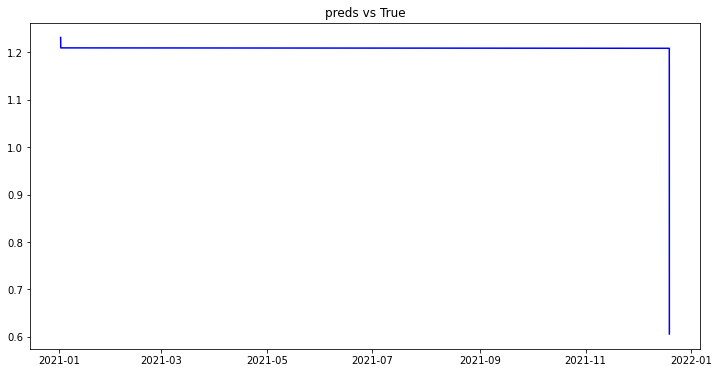

In [104]:
plot('Sarimax00012')

In [ ]:
def data_cleaning(df):
    df=df.set_index('incident_datetime')
    df=df.dropna()
    print ('dropped null values')
    df=df.loc['01-01-2018':]
    print ('selected incidents after 2010')
    df.latitude=df.latitude.astype(float)
    print ('lat is now a float')
    df.longitude=df.longitude.astype(float)
    print ('long is now a float')
    df.day_of_week=df.day_of_week.str.lower()
    print ('day of week is now all lower case')
    return df 



def date_parsingdf(df):
    #used to extract date data, to get rid of a set of features and set
    df=df.drop(['latitude','longitude','parent_incident_type','day_of_week'],axis=1)
    print ("unecessary features eliminated")
    #setting index 
    #df=df.set_index('incident_datetime')
    #resampling down to the minute 
    df=df.resample('30 min').sum()
    #resetting the index to perform the next task 
    df=df.reset_index()
    #extracting date data as features  
    df['month']=df.incident_datetime.dt.month
    df['day']=df.incident_datetime.dt.day
    df['hour']=df.incident_datetime.dt.hour
    df['minute']=df.incident_datetime.dt.minute
    print (" 4 date related features was created")
    df['DayofWeek']=df['incident_datetime'].dt.weekday
    # dropping unecessary items for time series analysis 
    df=df.set_index('incident_datetime')
    print ('index is set again')
    
    
    return df 

def sliced(df):
    df=df.sort_values('incident_datetime')
    print ('values sorted')
    #df=df.set_index('incident_datetime')
    print("index_set")
    print('fist slice successful')
    train=df[:'01-01-2021']
    print ('train sucessful')
    test=df['01-02-2021':]
    print ('test sucessful')
    return train,test

def date_train_test(train,test):

    train_exog=train.drop('log',axis=1)
    print ('train exog was created')
    train_endog=train.log
    print ('train endog was created')
    test_exog=test.drop('log',axis=1)
    print ('test exog was created ')
    test_endog=test.log
    print ('test endog was created')
    #train_exog=train.resample('1 min').sum()
    #test=test.resample('1 min').sum()
    return train_exog, train_endog, test_exog, test_endog

def min_max_scaling(train_exog,test_exog):
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler().fit(train_exog)
    train_exog_scaled=scaler.transform(train_exog)
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler().fit(test_exog)
    test_exog_scaled=scaler.transform(test_exog)
    return train_exog_scaled , test_exog_scaled